In [1]:
import os
import shutil
import pathlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

random_seed = 0

In [2]:
json_path = pathlib.Path('data', 'yelp_photos', 'photos.json')
data_photos = pd.read_json(json_path, lines=True)
data_photos.head()

,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food


In [3]:
data_photos.describe().T

,count,unique,top,freq
photo_id,200100,200098,_CYoxbCIKuAwpq4crHCPWg,2
business_id,200100,36680,FEXhWNCMkv22qG04E83Qjg,528
caption,200100,76413,,103366
label,200100,5,food,108152


In [4]:
data_photos.label.unique()

array(['inside', 'outside', 'drink', 'food', 'menu'], dtype=object)

>#### On a donc 5 catégories pour lesquelles il va falloir récupèrer de 100 à 200 images

In [5]:
sample_size = 200
data_photos_selection = pd.DataFrame()
for label in data_photos.label.unique():
    print(label)
    data_photos_selection = pd.concat([data_photos_selection, data_photos[data_photos.label == label].sample(sample_size, random_state=random_seed)], axis=0)

inside
outside
drink
food
menu


In [6]:
display(data_photos_selection.head(2), data_photos_selection.shape)

,photo_id,business_id,caption,label
26366,4bCgKE0Itp0T8wQXpYsypg,B0TP0GVKZKAi05p-sTjc6w,Kerry Courtney (11.16.2018),inside
88249,RN1AVvw1HXLceaNJkI0GdQ,zNBtF87cr_uzqloqWdO34g,entrance,inside


(1000, 4)

In [7]:
data_photos_selection.label.value_counts()

inside     200
outside    200
drink      200
food       200
menu       200
Name: label, dtype: int64

## Transfère des images sélectionnées

In [8]:
src_path = pathlib.Path('data', 'yelp_photos', 'photos')
new_path = pathlib.Path('data', 'photos')

### On supprimer un éventuel ancien dossier contenant les images

In [9]:
if os.path.exists(new_path):
    for file in  os.listdir(new_path):
        os.remove(pathlib.Path(new_path, file))
    os.rmdir(new_path)

### Création d'un dossier pour stocker les images sélectionnées

In [10]:
os.mkdir(new_path)

In [11]:
for photo_name in data_photos_selection.photo_id:
    src = pathlib.Path(src_path, f"{photo_name}.jpg")
    dst = pathlib.Path(new_path, f"{photo_name}.jpg")
    shutil.copyfile(src, dst)
print("Copie des images sélectionnée terminé")

Copie des images sélectionnée terminé


# Pré-traitement des images sélectionnées

### On supprimer un éventuel ancien dossier contenant les images pré-traitées

In [12]:
preprocessed_path = pathlib.Path('data', 'photos_preprocessed')

In [13]:
if os.path.exists(preprocessed_path):
    for file in  os.listdir(preprocessed_path):
        os.remove(pathlib.Path(preprocessed_path, file))
    os.rmdir(preprocessed_path)

### On va pré-traiter les images

In [14]:
os.mkdir(preprocessed_path)

In [47]:
from PIL import Image, ImageFilter, ImageOps
from matplotlib import gridspec

data/photos/uy01VUORpDP49vJ2pG-Rug.jpg INSIDE


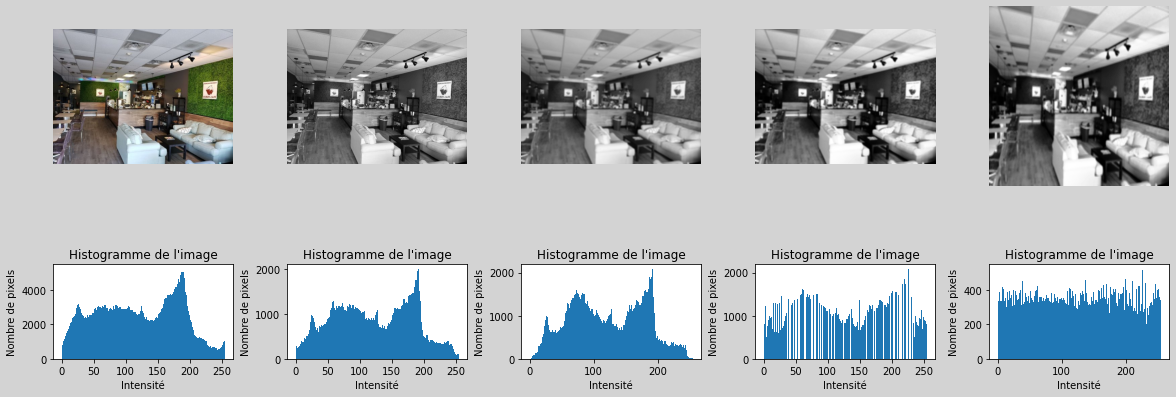

data/photos/qpDyhRakiSQv6QrnUJ5gVw.jpg OUTSIDE


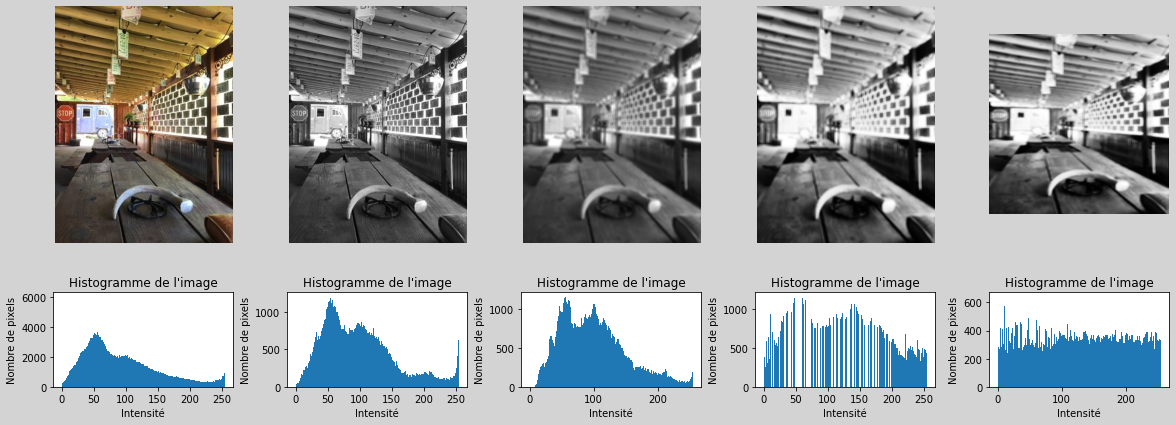

data/photos/YXtXa2E_YTQvEfTzU5DxfA.jpg DRINK


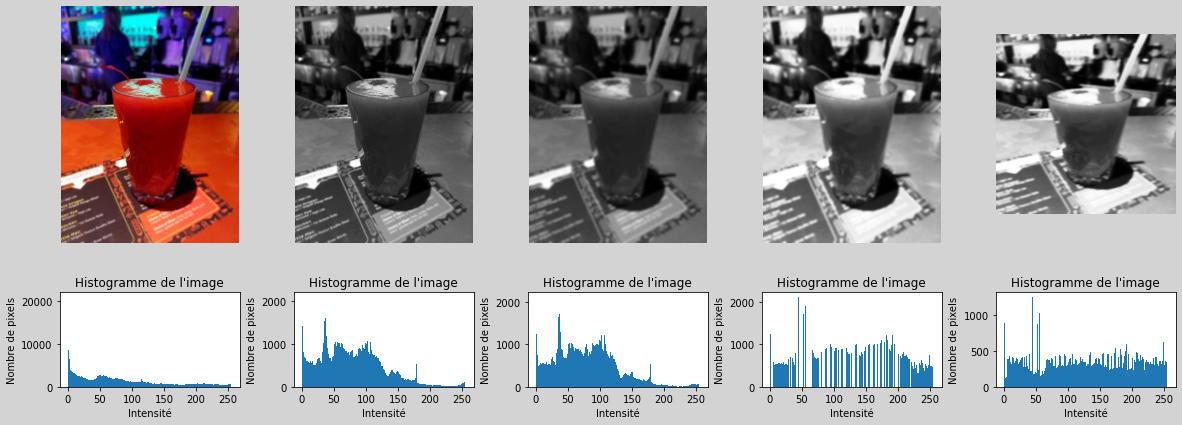

data/photos/AY4kTsZHpCLkldIIaA31lg.jpg DRINK


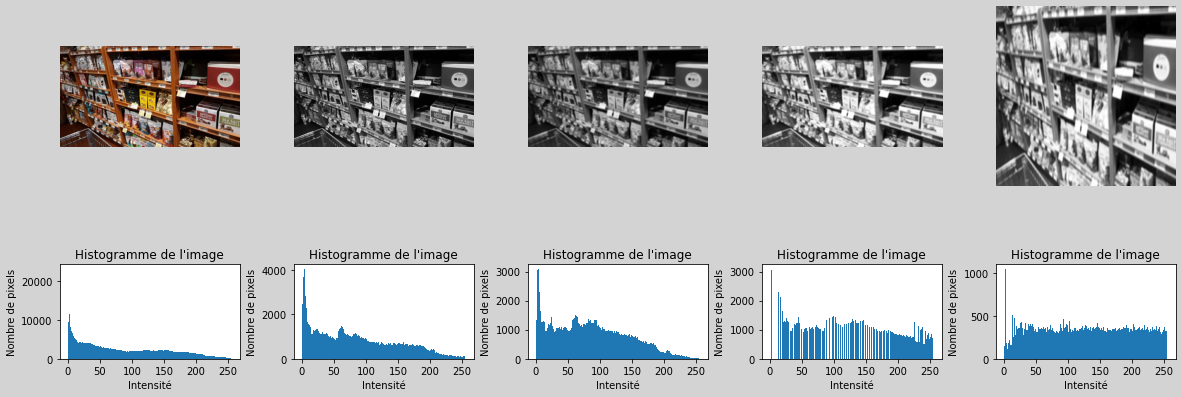

data/photos/_RfkfluMoBfIbS0WVEJmkw.jpg FOOD


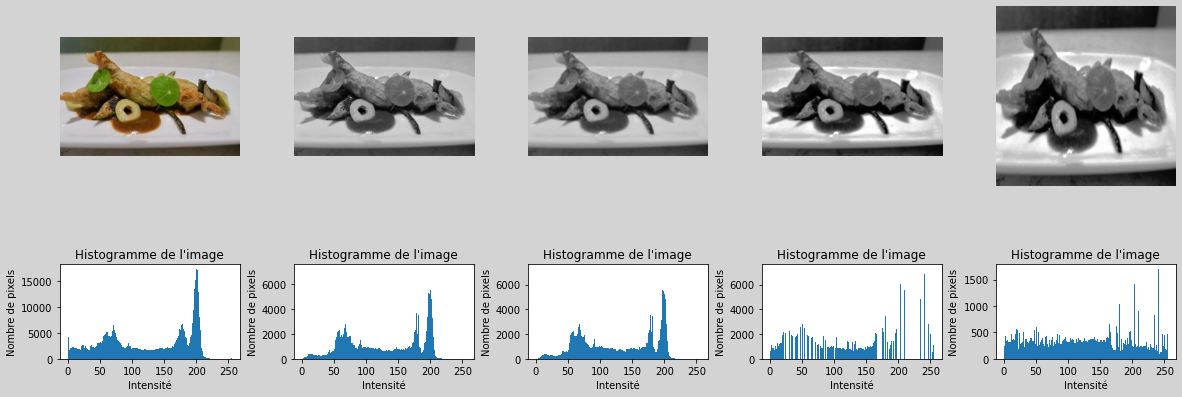

In [87]:
sample_id_show = data_photos_selection.photo_id.sample(5).to_list()
param_blur = 2
newsize = (300, 300)

for i, photo in data_photos_selection.iterrows():
    img_path = pathlib.Path(new_path, f"{photo.photo_id}.jpg")
    img = Image.open(img_path)
    
    # Gray
    gray_img = ImageOps.grayscale(img)
    
    # Blur
    blured_img = gray_img.filter(ImageFilter.BoxBlur(param_blur))
    
    # Equalize
    equalized_img = ImageOps.equalize(blured_img)
    
    # Resize
    final_img = equalized_img.resize(newsize)
    
    # Save image
    export_path = pathlib.Path(preprocessed_path, f"{photo.photo_id}.jpg")
    final_img.save(export_path)

    if photo.photo_id in sample_id_show:
        print(img_path, photo.label.upper())
        fig = plt.figure(figsize=(20,7), facecolor='lightgray')
        
        steps_show=[img, gray_img, blured_img, equalized_img, final_img]
        
        spec = gridspec.GridSpec(
                        ncols=5, nrows=2,
                        width_ratios=[1, 1, 1, 1, 1], wspace=0.3,
                        hspace=0.3, height_ratios=[5, 2]
                        )
        
        for i, image in enumerate(steps_show):
                    
            fig.add_subplot(spec[i])
            plt.imshow(image, cmap='gray', vmin=0, vmax=255)
            plt.axis('off')

            fig.add_subplot(spec[i+len(steps_show)])
            mat = np.array(image)
            plt.title("Histogramme de l'image")
            plt.hist(mat.flatten(), bins=range(256))
            plt.xlabel('Intensité')
            plt.ylabel('Nombre de pixels')

        plt.show()

L'**histogramme** d'une image numérique est une courbe statistique représentant la répartition de ses pixels selon leur intensité. <br>Pour une image en noir et blanc, il indique en abscisse le niveau de gris (entier entre 0 et 255) et en ordonnée, le nombre de pixels ayant cette valeur.

Lorsque l'histogramme est **normalisé**, il indique en ordonnée la probabilité pi de trouver un pixel de niveau de gris i dans l'image. (ce n'est pas le cas ci-dessus)

Un **histogramme cumulé normalisé** calcule le pourcentage de pixels ayant une valeur inférieure à un niveau de gris donné. (ce n'est pas le cas ci-dessus)